# 타이타닉 생존 예측

**목표**: 승객 정보를 바탕으로 생존 여부를 예측하는 머신러닝 모델 만들기

---

## Step 0: 한글 폰트 설정

Colab에서 그래프에 한글을 표시하려면 먼저 이 셀을 실행하세요!

In [ ]:
# 한글 폰트 설치 (처음 한 번만 실행하면 됨)
!apt-get install -y fonts-nanum > /dev/null 2>&1

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

print("한글 폰트 설정 완료!")

한글 폰트 설정 완료!


## Step 1: 라이브러리 불러오기

머신러닝에 필요한 도구들을 가져옵니다.

In [ ]:
import pandas as pd                           # 데이터 처리
import numpy as np                            # 수학 연산

from sklearn.model_selection import train_test_split  # 데이터 분리
from sklearn.ensemble import RandomForestClassifier   # 랜덤포레스트 모델
from sklearn.metrics import accuracy_score            # 정확도 측정

print("라이브러리 로드 완료!")

라이브러리 로드 완료!


## Step 2: 데이터 불러오기

인터넷에서 타이타닉 데이터를 다운로드합니다.

In [ ]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

print(f"데이터 크기: {df.shape[0]}명의 승객, {df.shape[1]}개의 컬럼")
print("\n처음 5개 행:")
df.head()

데이터 크기: 891명의 승객, 12개의 컬럼

처음 5개 행:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 컬럼 설명

| 컬럼 | 설명 |
|------|------|
| Survived | 생존 여부 (0=사망, 1=생존) - 우리가 예측할 것! |
| Pclass | 객실 등급 (1, 2, 3등석) |
| Sex | 성별 (male/female) |
| Age | 나이 |
| SibSp | 함께 탑승한 형제/배우자 수 |
| Parch | 함께 탑승한 부모/자녀 수 |
| Fare | 요금 |

## Step 3: 데이터 전처리

머신러닝 모델이 이해할 수 있도록 데이터를 정리합니다.

In [ ]:
# 1. 사용할 컬럼만 선택
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
df_clean = df[features + ['Survived']].copy()

# 2. 결측치(빈 값) 제거
df_clean = df_clean.dropna()
print(f"결측치 제거 후: {len(df_clean)}명")

# 3. 성별을 숫자로 변환 (ML은 숫자만 이해해요!)
df_clean['Sex'] = df_clean['Sex'].map({'male': 0, 'female': 1})

print("전처리 완료!")
df_clean.head()

결측치 제거 후: 714명
전처리 완료!


,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,0


## Step 4: 학습/테스트 데이터 분리

데이터를 80%는 학습용, 20%는 테스트용으로 나눕니다.

In [ ]:
# 피처(X)와 타겟(y) 분리
X = df_clean[features]      # 입력 데이터 (승객 정보)
y = df_clean['Survived']    # 정답 (생존 여부)

# 80% 학습용, 20% 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"학습 데이터: {len(X_train)}명")
print(f"테스트 데이터: {len(X_test)}명")

학습 데이터: 571명
테스트 데이터: 143명


## Step 5: 모델 학습

랜덤포레스트 알고리즘으로 모델을 학습시킵니다.

In [ ]:
# 랜덤포레스트 모델 만들기
model = RandomForestClassifier(
n_estimators=100,    # 나무 100개 사용
random_state=42      # 재현성을 위한 시드값
)

# 학습! (fit = 데이터에 맞추다)
model.fit(X_train, y_train)

print("모델 학습 완료!")

모델 학습 완료!


## Step 6: 예측 및 평가

학습된 모델로 테스트 데이터를 예측하고 정확도를 확인합니다.

In [ ]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

print("=" * 40)
print(f"모델 정확도: {accuracy:.2%}")
print("=" * 40)

모델 정확도: 78.32%


## Step 7: 피처 중요도 분석

어떤 요소가 생존에 가장 큰 영향을 미쳤을까요?

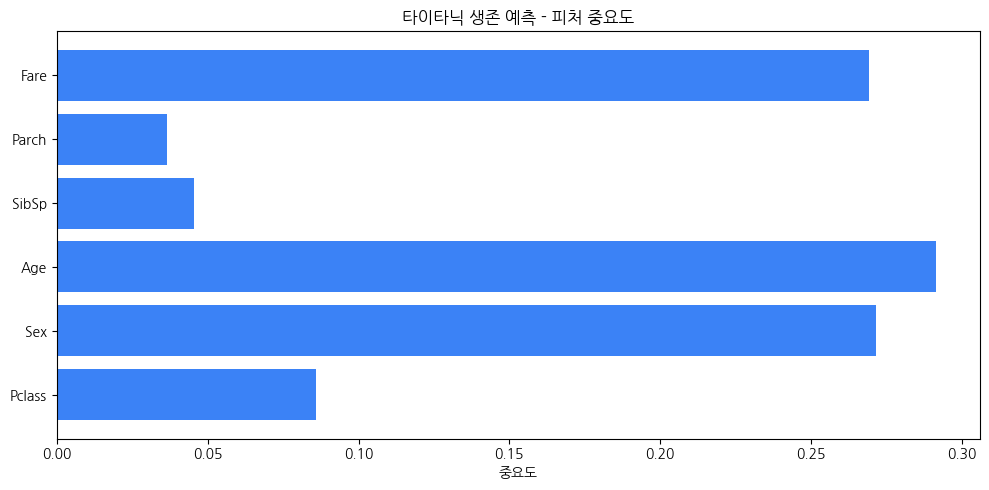


중요도 순위:
  Age: 0.291
  Sex: 0.272
  Fare: 0.269
  Pclass: 0.086
  SibSp: 0.046
  Parch: 0.036


In [ ]:
importance = model.feature_importances_

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.barh(features, importance, color='#3b82f6')
plt.xlabel('중요도')
plt.title('타이타닉 생존 예측 - 피처 중요도')
plt.tight_layout()
plt.show()

# 중요도 순위 출력
print("\n중요도 순위:")
for name, imp in sorted(zip(features, importance), key=lambda x: x[1], reverse=True):
    print(f"  {name}: {imp:.3f}")

## 도전 과제: 정확도 85% 넘기기!

현재 약 78%... 과연 85%를 넘길 수 있을까요?

In [40]:
# 도전 1: 피처 조합 바꿔보기
# 어떤 피처 조합이 가장 좋을까요?

# 피처 목록에서 추가/제거해보세요
my_features = ['Sex', 'Age', 'Pclass']

# 시도해볼 것들:
# - 'SibSp', 'Parch' 제거해보기
# - 'Pclass'만 사용해보기
# - 'Sex', 'Age'만 사용해보기

X_my = df_clean[my_features]
X_tr, X_te, y_tr, y_te = train_test_split(X_my, y, test_size=0.2, random_state=42)

my_model = RandomForestClassifier(n_estimators=100, random_state=42)
my_model.fit(X_tr, y_tr)

acc = my_model.score(X_te, y_te)
print(f"사용한 피처: {my_features}")
print(f"정확도: {acc:.2%}")
print()
if acc >= 0.85:
    print("축하합니다! 85% 달성!")
else:
    print(f"아쉽네요... {0.85 - acc:.1%} 더 필요해요. 다른 조합을 시도해보세요!")

사용한 피처: ['Sex', 'Age', 'Pclass']
정확도: 75.52%

아쉽네요... 9.5% 더 필요해요. 다른 조합을 시도해보세요!


In [35]:
# 도전 2: 하이퍼파라미터 튜닝
# n_estimators(나무 개수)와 max_depth(트리 깊이)를 조절해보세요

n_trees = 100      # 시도: 50, 100, 200, 500
max_depth = 10   # 시도: None, 5, 10, 20

tuned_model = RandomForestClassifier(
    n_estimators=n_trees,
    max_depth=max_depth,
    random_state=42
)
tuned_model.fit(X_train, y_train)

acc = tuned_model.score(X_test, y_test)
print(f"나무 {n_trees}개, 깊이 {max_depth} -> 정확도: {acc:.2%}")

나무 100개, 깊이 10 -> 정확도: 79.02%


In [ ]:
# 도전 3: 나라면 살아남았을까?
# 본인 정보를 입력해보세요!

# [Pclass, Sex, Age, SibSp, Parch, Fare]
# Pclass: 1=1등석, 2=2등석, 3=3등석
# Sex: 0=남자, 1=여자
# SibSp: 함께 탄 형제/배우자 수
# Parch: 함께 탄 부모/자녀 수
# Fare: 티켓 가격 (3등석 평균 약 13달러, 1등석 평균 약 84달러)

me = [[3, 0, 17, 0, 0, 13]]  # <- 본인 정보로 바꿔보세요!

survival_prob = model.predict_proba(me)[0][1]
prediction = model.predict(me)[0]

print(f"생존 확률: {survival_prob:.1%}")
print(f"예측 결과: {'생존!' if prediction == 1 else '사망...'}")

생존 확률: 5.9%
예측 결과: 사망...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
